In [21]:
# % of Exports is in Financial services
# Country	Most Recent Year	Most Recent Value	
# Hong Kong SAR, China	2018	22	
# Singapore	2018	18

In [22]:
# plot of top 10 trading partners of financial services, to see how money shifted
# retain original mapping/location
# general HK situ: increase in green, decrease in red
# specifically HK to SG: HK retain green, SG gain red

In [23]:
top=100

import pandas as pd
financialservices_HK = pd.read_csv("financialservices_HK.csv", encoding='latin-1')
financialservices_SG = pd.read_csv("financialservices_SG.csv", encoding='latin-1')

merged_df = pd.merge(financialservices_HK, financialservices_SG, on='Importers', suffixes=('_HK', '_SG'))
joined_df = merged_df[1:].head(top) # top 10 overlapping financial services consumers for HK & SG by Export value

HK_to_SG = financialservices_HK[financialservices_HK['Importers']=='Singapore']
SG_to_HK = financialservices_SG[financialservices_SG['Importers']=='Hong Kong, China']


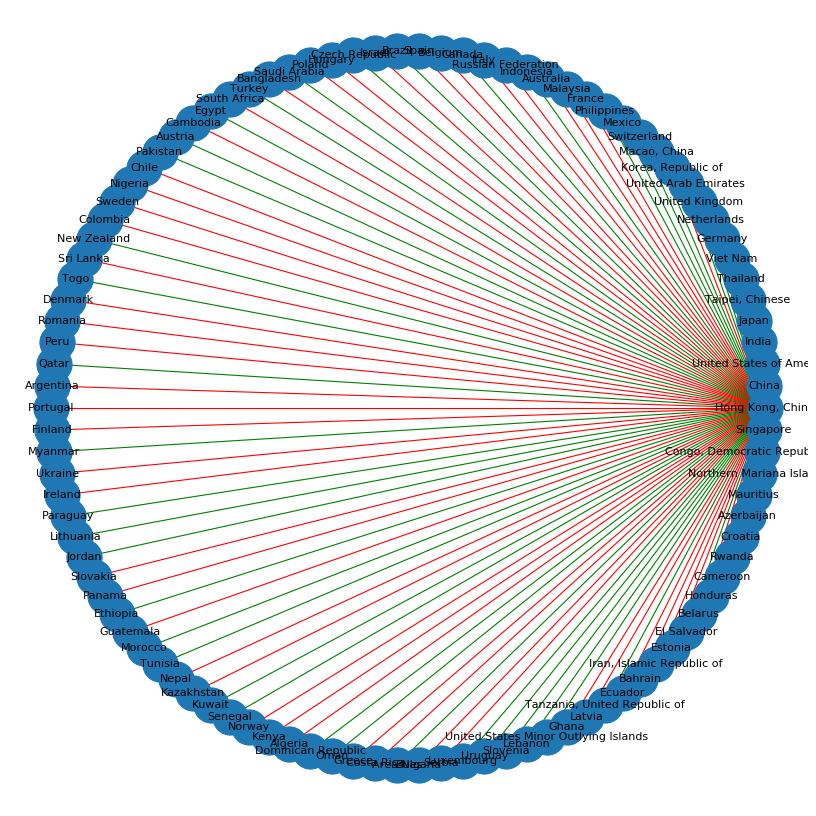

In [18]:
# HK, 2018 to 2019, color red if lose business and green if gain business

import networkx as nx 
import matplotlib.pyplot as plt
import itertools

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

G = nx.Graph() 
# G1 = nx.Graph()
# adj_list = {2: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 3: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 5: [2, 3, 4, 5, 6, 7, 8, 9]}
# import matplotlib.pyplot as plt 
# for i, j in adj_list.items():
#     for k in j:
#         G.add_edge(i, k)  

for index, row in joined_df.iterrows():
    if row[joined_df.columns[10]]-row[joined_df.columns[9]]>0:
        G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='green')
    if row[joined_df.columns[10]]-row[joined_df.columns[9]]<0:
        G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='red')
    
if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]>0:
    G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='green')
if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]<=0:
    G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
# G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
    
# G.add_edge(1,2, weight=1)

# pos = nx.spring_layout(G, k=0.15,iterations=50)
pos = nx.circular_layout(G)
# pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
# nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
# plt.draw() 
# plt.figure() # To plot the next graph in a new figure
# plt.show()

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=10, edges=edges, edge_color=colors)

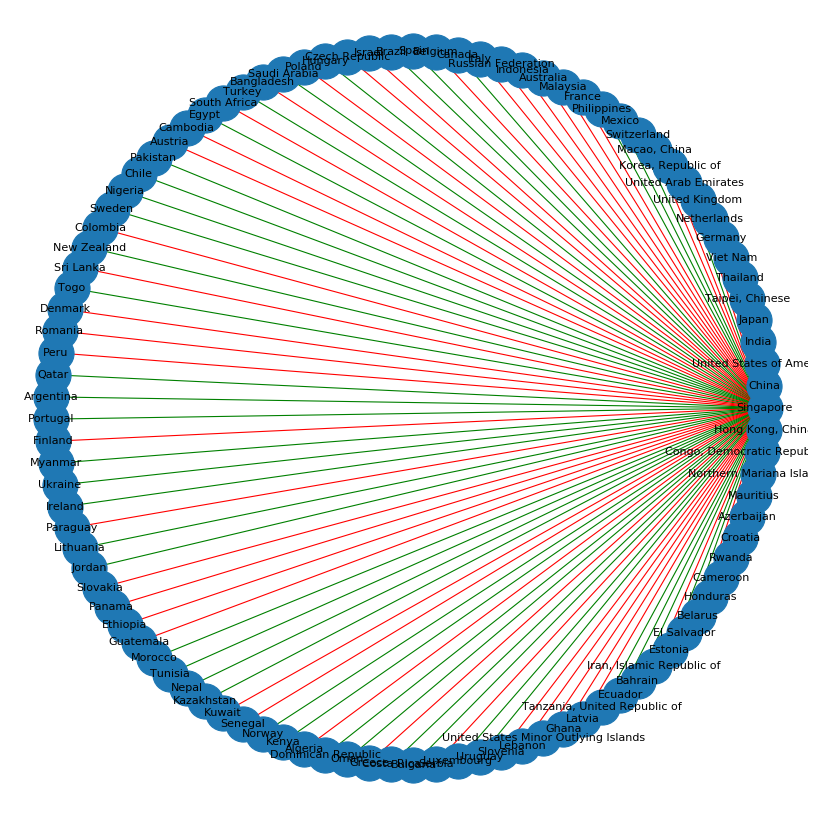

In [20]:
# SG, 2018 to 2019, color red if lose business and green if gain business

import networkx as nx 
import matplotlib.pyplot as plt
import itertools

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

G = nx.Graph() 
# G1 = nx.Graph()
# adj_list = {2: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 3: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 5: [2, 3, 4, 5, 6, 7, 8, 9]}
# import matplotlib.pyplot as plt 
# for i, j in adj_list.items():
#     for k in j:
#         G.add_edge(i, k)  

for index, row in joined_df.iterrows():
    if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]>0:
        G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='green')
    if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]<0:
        G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='red')
    
if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]>0:
    G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color='green')
if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]<=0:
    G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color='red')
# G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
    
# G.add_edge(1,2, weight=1)

# pos = nx.spring_layout(G, k=0.15,iterations=50)
pos = nx.circular_layout(G)
# pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
# nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
# plt.draw() 
# plt.figure() # To plot the next graph in a new figure
# plt.show()

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=10, edges=edges, edge_color=colors)

In [ ]:
# all edges of HK and SG

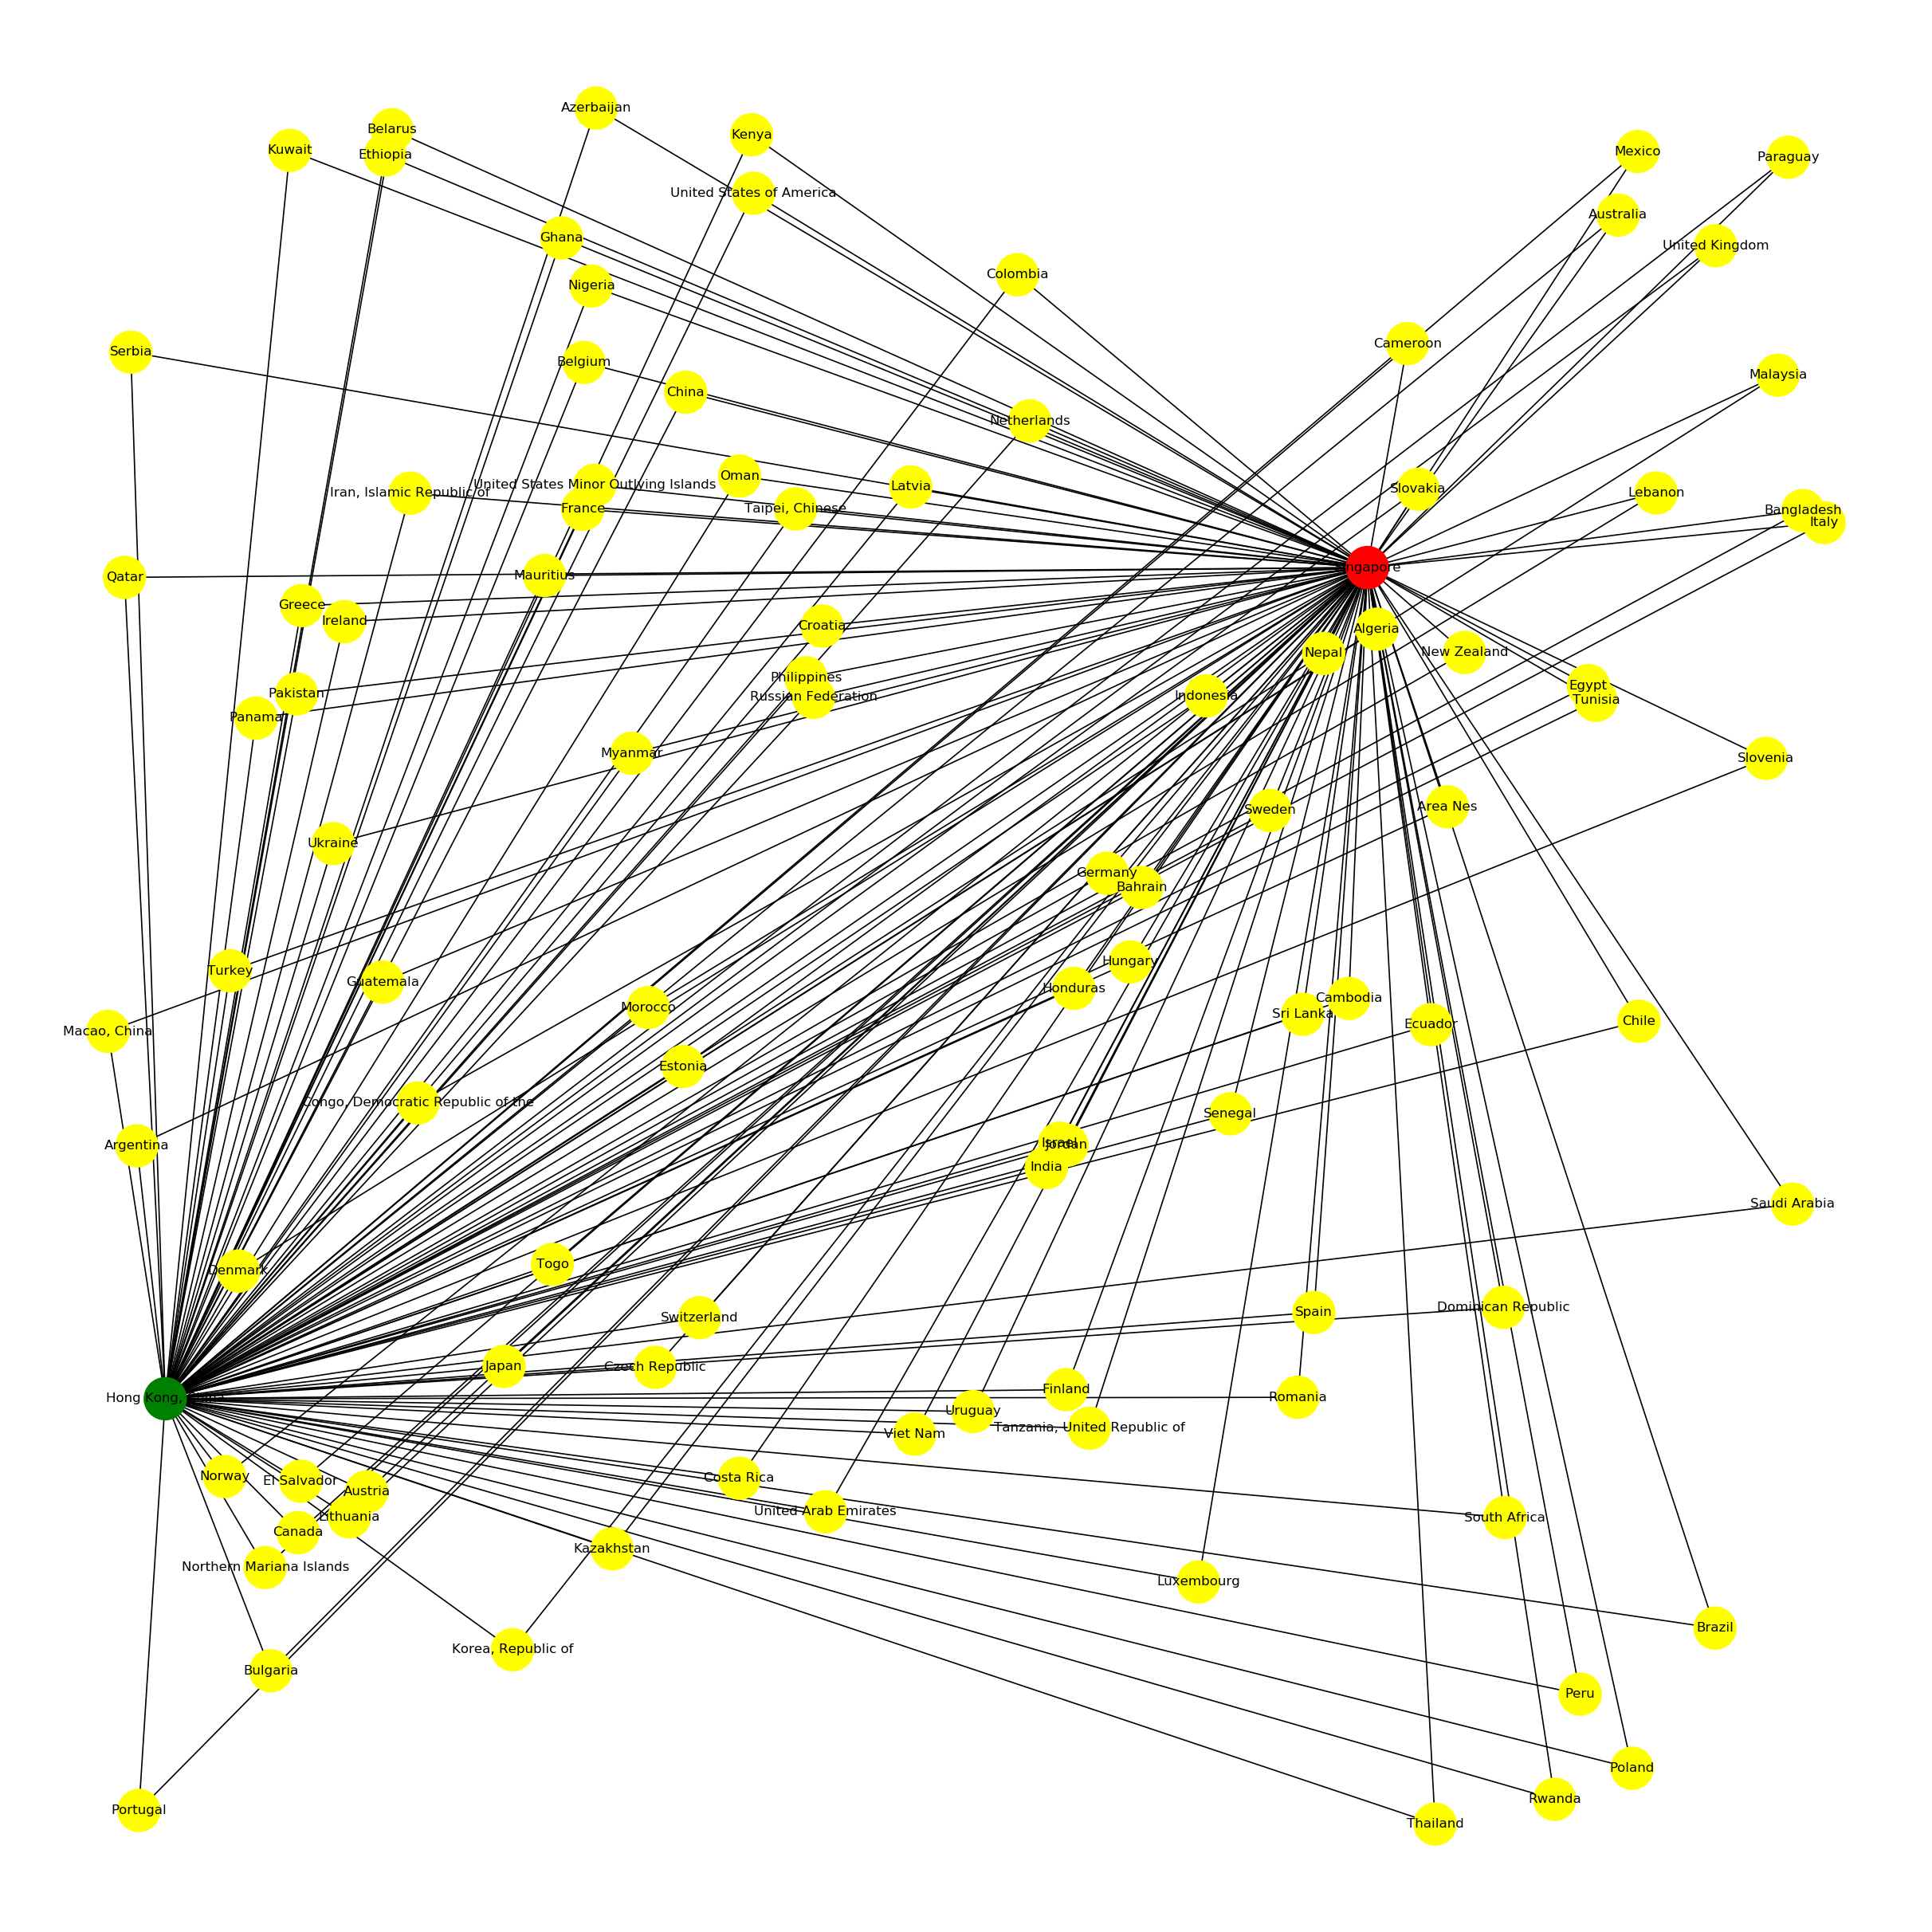

In [59]:
# HK, 2018 to 2019, color red if lose business and green if gain business

import networkx as nx 
import matplotlib.pyplot as plt
import itertools

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=120, facecolor='w', edgecolor='k')

G = nx.Graph() 

for index, row in joined_df.iterrows():
    G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]])
G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10])

for index, row in joined_df.iterrows():
    G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]])
G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10])

# pos = nx.spring_layout(G, k=0.15,iterations=50)
pos = nx.random_layout(G)
# pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
# nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
# plt.draw() 
# plt.figure() # To plot the next graph in a new figure
# plt.show()

edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

color_map = []
for node in G:
    if node == "Hong Kong, China":
        color_map.append('green')
    
    else:
        if node == "Singapore":
            color_map.append('red')
        else:
            color_map.append('yellow')


nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=10, edges=edges, node_color = color_map)